<a href="https://colab.research.google.com/github/Zulfa-Varvani/ML-things/blob/main/Mentorship_Program_Insights_2021_2022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()
sns.set_style('darkgrid')

from google.colab import files
uploaded = files.upload()

Saving Mentorship Program Applications.csv to Mentorship Program Applications.csv


In [ ]:
import io

df = pd.read_csv(io.BytesIO(uploaded['Mentorship Program Applications.csv']))
df.head()

,Timestamp,Email Address,Full Name (first and last),Phone number,Do you identify as a female?,Which institution do you go to?,What year are you in?,What is your major?,Please upload a PDF of your resume,Please put a link to your LinkedIn,What is your area of interest?,Tell us a bit about yourself. Why are you interested in STEAM?,What are you interested in learning from the mentorship program? What is your goal?,What areas do you feel your require more support in? Please explain.,"If you are chosen to partake in this Mentorship program as a Mentee, are you able to attend the Mentorship Program Kick-off Event on September 9, 2021? (Virtually)",I acknowledge that I will commit to taking on the roles and responsibilities of a Mentee if chosen as all parties have invested significant resources to make this program a success.
0,7/29/2021 13:02:24,queenie.zhu@ryerson.ca,Queenie Zhu,6479752689,Yes,Ryerson University,Year 4,Business,https://drive.google.com/open?id=1bNqcPNUiXOFX...,https://www.linkedin.com/in/queenieezhu/,Data Science,I am a Marketing Management Major pursuing a m...,I would love the opportunity to learn from Cap...,I feel that I lack real-world work experiences...,Yes,Yes
1,7/29/2021 13:27:50,aashnav2001@gmail.com,Aashna Vasudeva,4379715147,Yes,University of Toronto,Year 3,Computer Science,https://drive.google.com/open?id=16QbO6mQqBN2U...,https://www.linkedin.com/in/aashna-vasudeva-37...,Software Engineering,I am a third year student at the University of...,"Being a university student, my exposure to ind...",I believe I lack in my ability to reach out to...,Yes,Yes
2,7/30/2021 9:41:55,anoushkasinghalcs@gmail.com,Anoushka Singhal,6478691051,Yes,Carleton University,Year 4,Computer Science,https://drive.google.com/open?id=1QTITSgCsgOeP...,https://ca.linkedin.com/in/anoushkasinghal,Data Science,I am a 4th year CS student and I enjoy coding....,I would like to expand my horizon and learn mo...,I would like to get into data science and prac...,Yes,Yes
3,8/1/2021 0:50:49,emilylaox@gmail.com,Emily Lao,6477236868,Yes,Western University,Year 2,Business,https://drive.google.com/open?id=14Tc83zCPvJQ5...,linkedin.com/in/elao,Software Engineering,My growing interest in STEAM came by during qu...,My largest differentiating factor throughout t...,"As mentioned in the previous question, there a...",Yes,Yes
4,8/2/2021 0:48:04,isabella.enriquez@queensu.ca,Isabella Enriquez,6479859749,Yes,Queen's University,Year 3,Computer Science,https://drive.google.com/open?id=1pUrbfNB_wHI6...,https://linkedin.com/in/isabellaenriquez,Software Engineering,I first got into tech when I accidentally took...,One of my main goals in life is to just consta...,I think an area I need the most support in is ...,Yes,Yes


In [ ]:
#dropping unnecassary columns
cols_drop = ['Timestamp', 'Email Address', 'Phone number', 'Please upload a PDF of your resume', 'Please put a link to your LinkedIn',
             'Tell us a bit about yourself. Why are you interested in STEAM?', 'What are you interested in learning from the mentorship program? What is your goal?',
             'What areas do you feel your require more support in? Please explain.',
             'If you are chosen to partake in this Mentorship program as a Mentee, are you able to attend the Mentorship Program Kick-off Event on September 9, 2021? (Virtually)',
             'I acknowledge that I will commit to taking on the roles and responsibilities of a Mentee if chosen as all parties have invested significant resources to make this program a success.',
             ]
    
df.drop(cols_drop, axis=1, inplace=True)
df.head()

,Full Name (first and last),Do you identify as a female?,Which institution do you go to?,What year are you in?,What is your major?,What is your area of interest?
0,Queenie Zhu,Yes,Ryerson University,Year 4,Business,Data Science
1,Aashna Vasudeva,Yes,University of Toronto,Year 3,Computer Science,Software Engineering
2,Anoushka Singhal,Yes,Carleton University,Year 4,Computer Science,Data Science
3,Emily Lao,Yes,Western University,Year 2,Business,Software Engineering
4,Isabella Enriquez,Yes,Queen's University,Year 3,Computer Science,Software Engineering


In [ ]:
df.describe()

,Full Name (first and last),Do you identify as a female?,Which institution do you go to?,What year are you in?,What is your major?,What is your area of interest?
count,58,58,58,58,58,58
unique,58,2,18,5,22,2
top,Zoey Zheng,Yes,University of Waterloo,Year 3,Computer Science,Software Engineering
freq,1,55,14,28,26,35


In [ ]:
#rename columns and some values
df = df.rename(columns={'Full Name (first and last)': 'Name',
                        'Which institution do you go to?' : 'School',
                        'What year are you in?': 'Year',
                        'What is your major?': 'Program',
                        'What is your area of interest?': 'Interest'})

df = df.rename(columns={df.columns[1]: 'Gender'})

df['School'] = df['School'].replace(['Ryerson University ', 'Ryerson university', 'Ryerson university '], 'Ryerson University')
df['School'] = df['School'].replace(['University of Toronto Mississauga', 'University of Toronto Mississauga ',
                                     'University of Toronto - St. George Campus', 'University of Toronto Scarborough', 'University of Toronto '],
                                    'University of Toronto')
df['School'] = df['School'].replace(['Carleton university', 'Western University '], ['Carleton University', 'Western University'])
df['Year'] = df['Year'].replace(['Internship program between 3rd and 4th year', 'going into year 2'], ['Year 4', 'Year 2'])

df.head()

,Name,Gender,School,Year,Program,Interest
0,Queenie Zhu,Yes,Ryerson University,Year 4,Business,Data Science
1,Aashna Vasudeva,Yes,University of Toronto,Year 3,Computer Science,Software Engineering
2,Anoushka Singhal,Yes,Carleton University,Year 4,Computer Science,Data Science
3,Emily Lao,Yes,Western University,Year 2,Business,Software Engineering
4,Isabella Enriquez,Yes,Queen's University,Year 3,Computer Science,Software Engineering


In [ ]:
df = df[df.Gender != 'No']
df['Gender'].value_counts()

Yes    55
Name: Gender, dtype: int64

In [ ]:
df['School'].value_counts()

University of Waterloo    14
University of Toronto     14
Ryerson University        11
Carleton University        5
Western University         5
University of Ottawa       2
Queen's University         2
University of Guelph       1
York University            1
Name: School, dtype: int64

In [ ]:
df['Program'].value_counts()
#sort programs according to STEAM

Computer Science                               25
Computer Engineering                            6
Biomedical Engineering                          3
Business                                        3
Software Engineering                            2
Computational Cognitive Science                 1
Nanotechnology Engineering                      1
Data science and informatics                    1
Biology > Data Science                          1
Biomedical Engineering                          1
Computer Science and Business Double Degree     1
Data Science                                    1
Management Engineering                          1
Financial Mathematics                           1
Molecular Biology & Biotechnology               1
Statistics Major, CS Minor                      1
Applied Mathematics                             1
Information Technology                          1
Statistics and Computer Science Minor           1
Economics                                       1


In [ ]:
#science - bio/chem/physics/enviornmental
#technology - cs/it/cybersecurity
#engineering - engineering
#arts - business/econ
#mathematics - statistics/data science/mathematics

df['Program'] = df['Program'].replace(['Biology > Data Science', 'Molecular Biology & Biotechnology'], 'Science')
df['Program'] = df['Program'].replace(['Computer Science', 'Computational Cognitive Science',
                                       'Information Technology'], 'Technology')
df.loc[df['Program'].str.contains('Engineering', case=False), 'Program'] = 'Engineering'
df['Program'] = df['Program'].replace(['Business', 'Economics'], 'Arts')
df['Program'] = df['Program'].replace(['Data Science', 'Financial Mathematics', 'Applied Mathematics', 'Data science and informatics'], 'Mathematics')
df['Program'] = df['Program'].replace(['Statistics Major, CS Minor', 'Statistics and Computer Science Minor'], 'Math Major, Technology Minor')

df['Program'].value_counts()

Technology                                     27
Engineering                                    14
Mathematics                                     4
Arts                                            4
Math Major, Technology Minor                    2
Science                                         2
Computer Science and Business Double Degree     1
Mathematics and Business                        1
Name: Program, dtype: int64

In [ ]:
df['Year'].value_counts()

Year 3    27
Year 2    20
Year 4     8
Name: Year, dtype: int64

In [ ]:
df['Interest'].value_counts()

Software Engineering    33
Data Science            22
Name: Interest, dtype: int64

In [ ]:
def count_col(col):
  count = df.School.isin([col]).sum(axis=0)
  ds = df[df.Interest.str.contains('Data Science')].School.isin([col]).sum(axis=0)
  se = df[df.Interest.str.contains('Software Engineering')].School.isin([col]).sum(axis=0)
  y2 = df[df.Year.str.contains('Year 2')].School.isin([col]).sum(axis=0)
  y3 = df[df.Year.str.contains('Year 3')].School.isin([col]).sum(axis=0)
  y4 = df[df.Year.str.contains('Year 4')].School.isin([col]).sum(axis=0)

  stats = np.array([count, ds, se, y2, y3, y4])
  return stats

In [ ]:
data_stats = pd.DataFrame(columns=['Ryerson University', 'University of Toronto', 'Carleton University','Western University',
                                   "Queen's University", 'University of Waterloo', 'York University', 'University of Guelph',
                                   'University of Ottawa'],
                            index=['Total', 'Data Science', 'Software Engineering', 'Year 2', 'Year 3', 'Year 4'])
for col in data_stats:
  data_stats[col] = count_col(col)
data_stats

,Ryerson University,University of Toronto,Carleton University,Western University,Queen's University,University of Waterloo,York University,University of Guelph,University of Ottawa
Total,11,14,5,5,2,14,1,1,2
Data Science,5,5,4,3,1,2,1,0,1
Software Engineering,6,9,1,2,1,12,0,1,1
Year 2,2,4,1,2,1,10,0,0,0
Year 3,7,7,3,2,1,3,1,1,2
Year 4,2,3,1,1,0,1,0,0,0


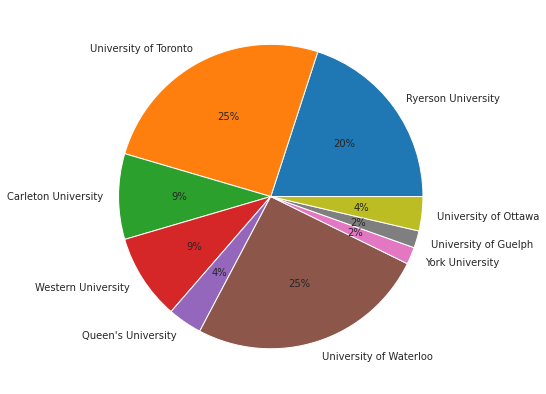

In [ ]:
fig = plt.figure(figsize=(10,7))
plt.pie(data_stats.iloc[0], labels = data_stats.columns, autopct='%.0f%%')
plt.show()

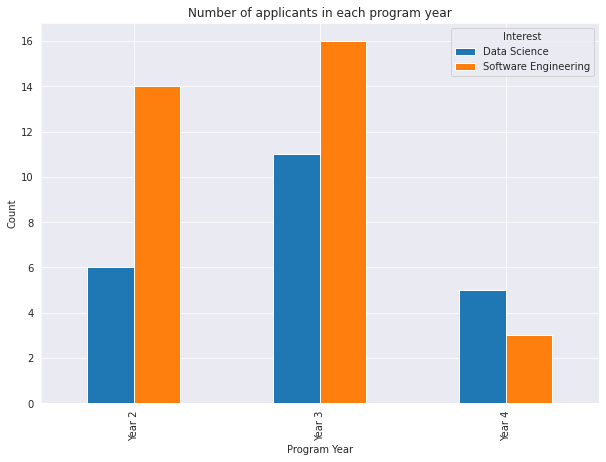

In [ ]:
data = df.groupby(['Year', 'Interest']).size()
data= data.unstack()
data.plot(xlabel='Program Year', ylabel='Count', kind='bar', figsize=(10,7), title='Number of applicants in each program year')

In [ ]:
df.describe()
#most are in University of Waterloo (14) or UofT (14), third year (27), computer science (25), and interested in software engineering (33)

,Name,Gender,School,Year,Program,Interest
count,55,55,55,55,55,55
unique,55,1,9,3,8,2
top,Zoey Zheng,Yes,University of Waterloo,Year 3,Technology,Software Engineering
freq,1,55,14,27,27,33
